**Approach : Logistic Regression with 70-30 split**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
myfile=pd.read_csv("Dataset.csv")

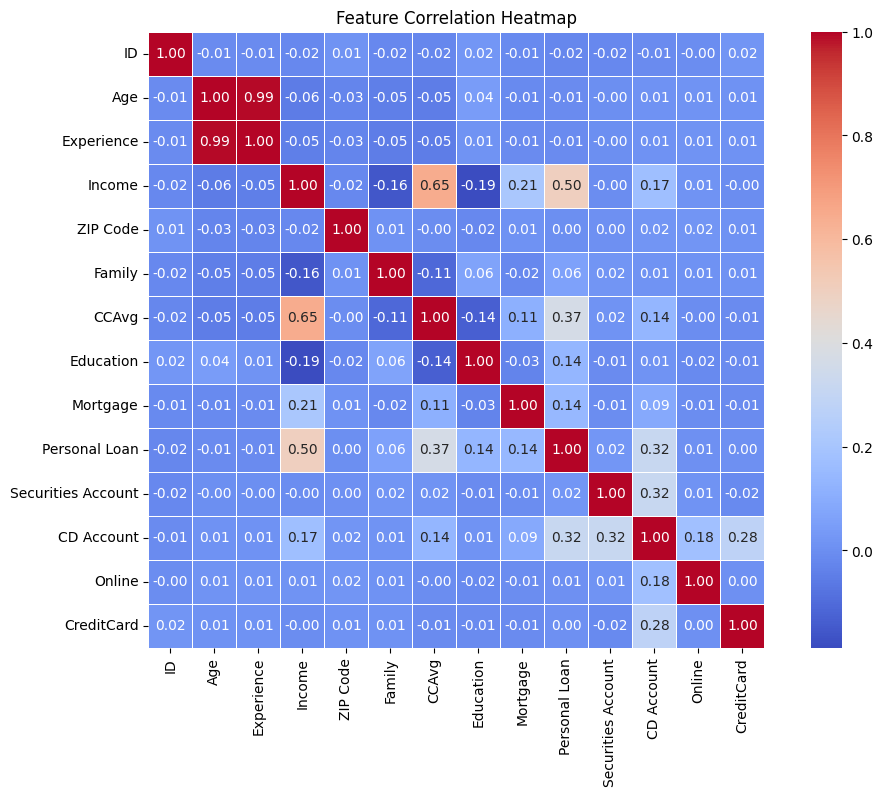

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = myfile.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
myfile.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
x=myfile.iloc[:,[3,6,11]].values
type(x)
y=myfile.iloc[:,9].values
type(y)
print(y)

[0 0 0 ... 0 0 0]


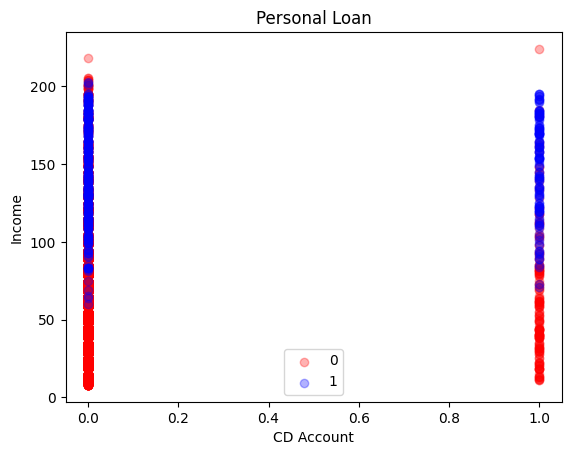

In [ ]:
class1 = myfile[myfile['Personal Loan'] == 0]
class2 = myfile[myfile['Personal Loan'] == 1]
plt.scatter(class1["CD Account"], class1["Income"], color='red', label="0", alpha=0.3)
plt.scatter(class2["CD Account"], class2["Income"], color='blue', label="1", alpha=0.3)
plt.xlabel("CD Account")
plt.ylabel("Income")
plt.title("Personal Loan")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=27)

In [ ]:
print(ytrain)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.linear_model import LogisticRegression
regModel=LogisticRegression()
regModel.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
ypredict=regModel.predict(xtest)
print(ypredict)

[0 0 0 ... 0 1 0]


<ipython-input-50-0a25ab7a845b>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


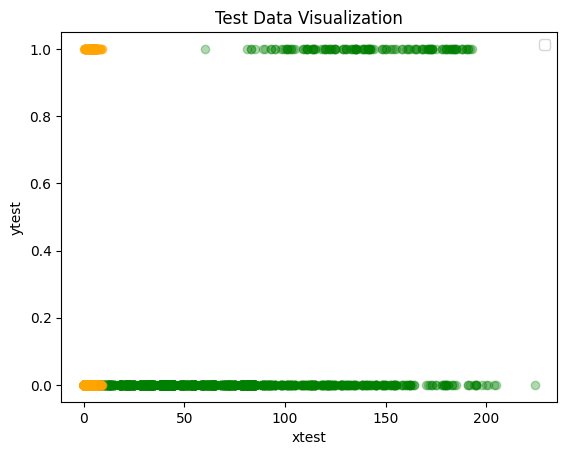

In [ ]:
plt.scatter(xtest[:, 0], ytest, color='green', alpha=0.3) # Using the first column (Experience)
plt.scatter(xtest[:, 1], ytest, color='orange', alpha=0.3) # Using the second column (Income)
plt.xlabel("xtest")
plt.ylabel("ytest")
plt.title("Test Data Visualization")
plt.legend()
plt.show()

Added step for calcualteing only accuracy

In [ ]:
from sklearn import metrics
print("Logistic Regression Model Accuracy (in %)",metrics.accuracy_score(ytest,ypredict)*100)

Logistic Regression Model Accuracy (in %) 91.66666666666666


In [ ]:
regModel.predict_proba(xtest)

array([[0.99439279, 0.00560721],
       [0.94105005, 0.05894995],
       [0.98375635, 0.01624365],
       ...,
       [0.98837405, 0.01162595],
       [0.41636382, 0.58363618],
       [0.99429791, 0.00570209]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(ytest, ypredict)
print(confusion_matrix1)

[[1317   38]
 [  87   58]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1355
           1       0.60      0.40      0.48       145

    accuracy                           0.92      1500
   macro avg       0.77      0.69      0.72      1500
weighted avg       0.91      0.92      0.91      1500



**Approach : Naive Bayes Algorithm with 70-30 split**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)

GaussianNB()

In [ ]:
y_pred=classifier.predict(xtest)
print(y_pred)

[0 0 0 ... 0 1 0]


In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes Model Accuracy (in %)",metrics.accuracy_score(ytest,y_pred)*100)

Gaussian Naive Bayes Model Accuracy (in %) 87.8


In [ ]:
from sklearn.metrics import confusion_matrix
con_matrix=confusion_matrix(ytest,y_pred)
print(con_matrix)

[[1233  122]
 [  61   84]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1355
           1       0.41      0.58      0.48       145

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.89      1500



**Approach : Decision Tree with 70-30 split**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(xtrain)
x_test=sc_x.transform(xtest)
print(xtrain)

[[4.20e+01 1.00e-01 0.00e+00]
 [2.30e+01 2.00e-01 0.00e+00]
 [2.30e+01 1.00e+00 0.00e+00]
 ...
 [1.45e+02 5.00e-01 0.00e+00]
 [6.90e+01 1.50e+00 0.00e+00]
 [6.20e+01 7.00e-01 1.00e+00]]


In [ ]:
print(xtest)

[[ 34.    1.5   0. ]
 [ 99.    1.7   0. ]
 [ 63.    1.6   0. ]
 ...
 [ 54.    1.2   0. ]
 [180.    8.9   0. ]
 [ 35.    0.2   0. ]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier=classifier.fit(xtrain,ytrain)

In [ ]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import metrics
print('Accuracy Score',metrics.accuracy_score(ytest,y_pred))

Accuracy Score 0.898


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
print(cm)

[[1343   12]
 [ 141    4]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1355
           1       0.25      0.03      0.05       145

    accuracy                           0.90      1500
   macro avg       0.58      0.51      0.50      1500
weighted avg       0.84      0.90      0.86      1500



In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200,random_state=43)
clf = clf.fit(xtrain, ytrain)

In [ ]:
y_pred=clf.predict(xtest)

In [ ]:
from sklearn import metrics
print('Accuracy Score',metrics.accuracy_score(ytest,y_pred)*100)

Accuracy Score 93.06666666666666


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
print(cm)

[[1315   40]
 [  64   81]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1355
           1       0.67      0.56      0.61       145

    accuracy                           0.93      1500
   macro avg       0.81      0.76      0.79      1500
weighted avg       0.93      0.93      0.93      1500

